In [3]:
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

# Carregar as imagens usando PIL
xadrez_img_pil = Image.open('XADREZ.png').convert('L')
xadrez_lowCont_img_pil = Image.open('xadrez_lowCont.png').convert('L')

# Converter para numpy array
xadrez_img_array = np.array(xadrez_img_pil)
xadrez_lowCont_img_array = np.array(xadrez_lowCont_img_pil)

def plot_image_and_histogram(image, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Exibir imagem
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title(title)
    ax[0].axis('off')

    # Exibir histograma
    ax[1].hist(image.ravel(), 256, [0,256])
    ax[1].set_title('Histograma')
    ax[1].set_xlabel('Intensidade')
    ax[1].set_ylabel('Quantidade de Pixels')

    plt.tight_layout()
    plt.show()

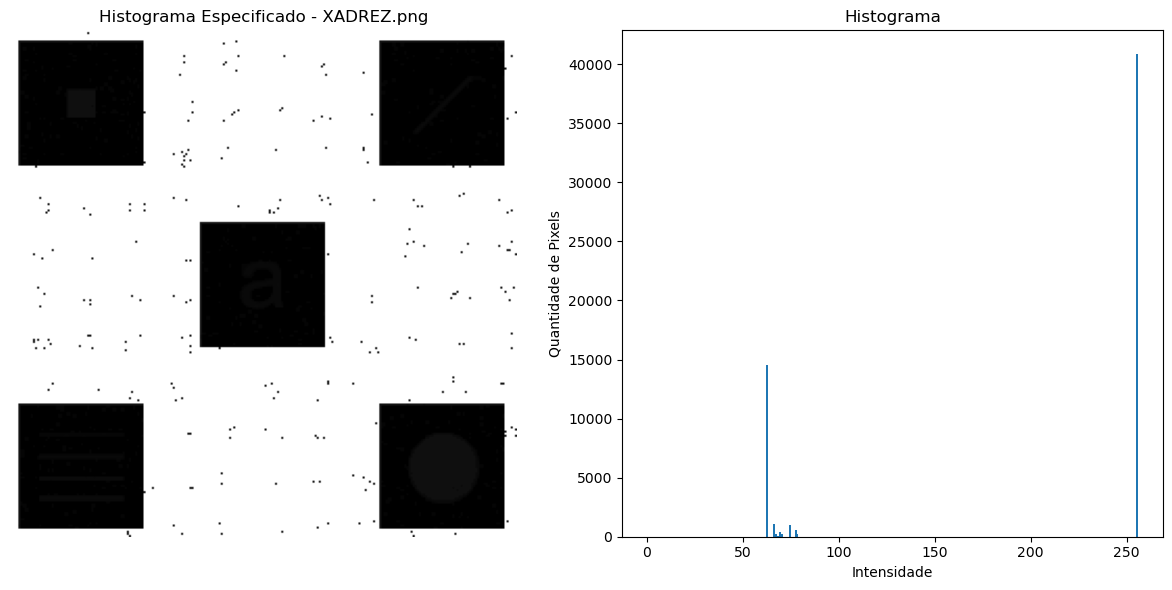

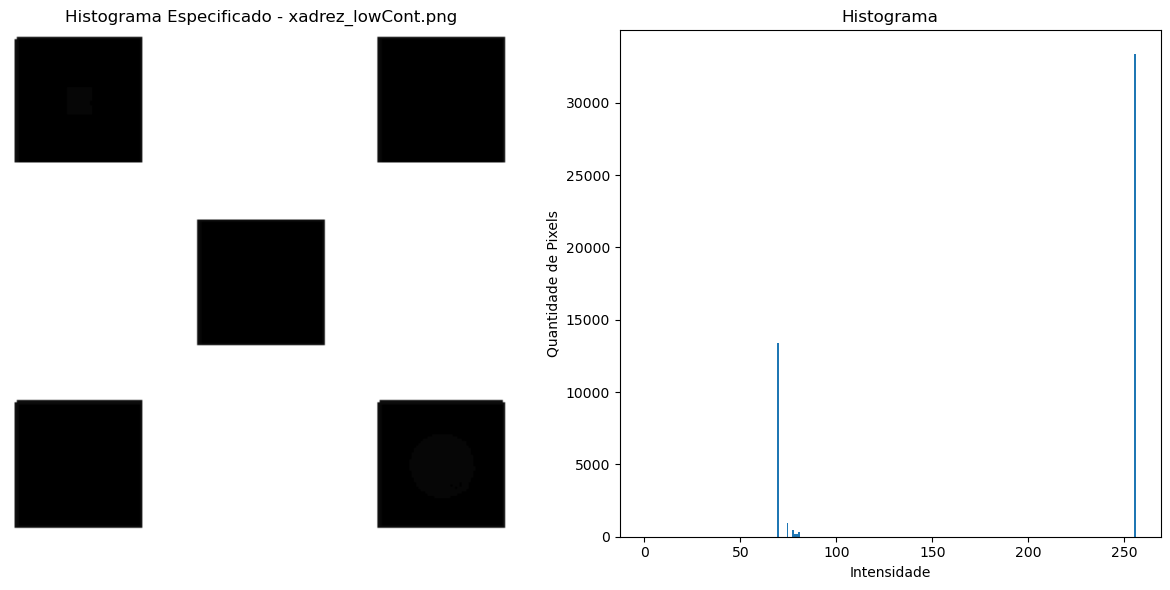

In [4]:
def histogram_matching(img, specified_hist):
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    cdf_img = hist.cumsum()
    cdf_img_normalized = cdf_img / cdf_img[-1]

    # Calcule o histograma cumulativo do histograma especificado
    cdf_specified = specified_hist.cumsum()
    cdf_specified_normalized = cdf_specified / cdf_specified[-1] # cdf_specified[-1] é o último valor do histograma

    mapping = np.zeros(256)
    for i in range(256):
        diff = np.abs(cdf_img_normalized[i] - cdf_specified_normalized)
        mapping[i] = np.argmin(diff)

    # Aplicar mapeamento à imagem
    output = mapping[img]
    return output

# Gerar um histograma uniforme
specified_hist = np.ones(256) * (xadrez_img_array.size / 256)

# Aplicar especificação de histograma
xadrez_img_matched = histogram_matching(xadrez_img_array, specified_hist)
xadrez_lowCont_img_matched = histogram_matching(xadrez_lowCont_img_array, specified_hist)

plot_image_and_histogram(xadrez_img_matched, 'Histograma Especificado - XADREZ.png')
plot_image_and_histogram(xadrez_lowCont_img_matched, 'Histograma Especificado - xadrez_lowCont.png')